# Lab 9: Searching

## <font color=DarkRed>Your Exercise: Recursive Binary Search without List Slicing</font>

The binary search algorithm in the textbook uses Python list slicing as part of the recursive divide-and-conquer approach it uses to solve the searching problem.

This is inefficient, as a new copy of the original input list is made at each recursive call. Albeit, the new list is reduced in size by $~alist//2$ each time `binary_search` is recursively executed.

Replace the use of list slicing with a technique that eliminates the unnecessary list copying. Recall that you will need to pass the list along with the starting and ending index values for the sublist. 

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

I provide you the code for recursive binary search, as found in the textbook. Use this code as the basis for your solution.

In [ ]:
def binary_search(alist, item, start, end):
    found = False 
    if end < start:
        return False 
# Caculate the midpoint    
    midpoint = (end+start)//2
# The situation when the value of the middle points is the item we look for
    if alist[midpoint]==item:
        found = True
# The situation the item is in the left side of the midpoint
    else:
        if item < alist[midpoint]:
            end = midpoint - 1
# The situation the item is in the right side of the midpoint
        else:
            start = midpoint + 1
            
    if found:
        return True 
# Recursion of the function if not found 
    else:
        return binary_search(alist,item,start,end)

## Testing

Generate a random, ordered list of integers and do a quick benchmark analysis to confim the $O(log_2(n))$ complexity of this algorithm after the change. Some timings and a simple plot should suffice. *Remember: binary search **requires** a sorted list for searching!*

In [120]:
# Simple test. Do more below...
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,55]
testlist.sort()
print(testlist)
print(binary_search(testlist,18,0,9))
print(binary_search(testlist,13,0,9))

[0, 1, 2, 8, 13, 17, 19, 32, 42, 55]
False
True


In [121]:
# define a function related to the lsit and the n 
def testSearch(lst, n):
    myrandomint = random.randint(0,600000)
    binary_search(lst, myrandomint, 0, n-1)

In [122]:
import timeit
import random 
times={}
for n in range(1000,100001,1000):
    # Make a list of random 'data with range n'
    lst = [random.randint(0,600000) for i in range(n)]
    lst.sort()
    t = timeit.Timer("testSearch(lst, n)", globals={'testSearch':testSearch,'lst':lst, 'n':n})
    times[n] = t.timeit(10000)

## Plot the timing 

<IPython.core.display.Javascript object>


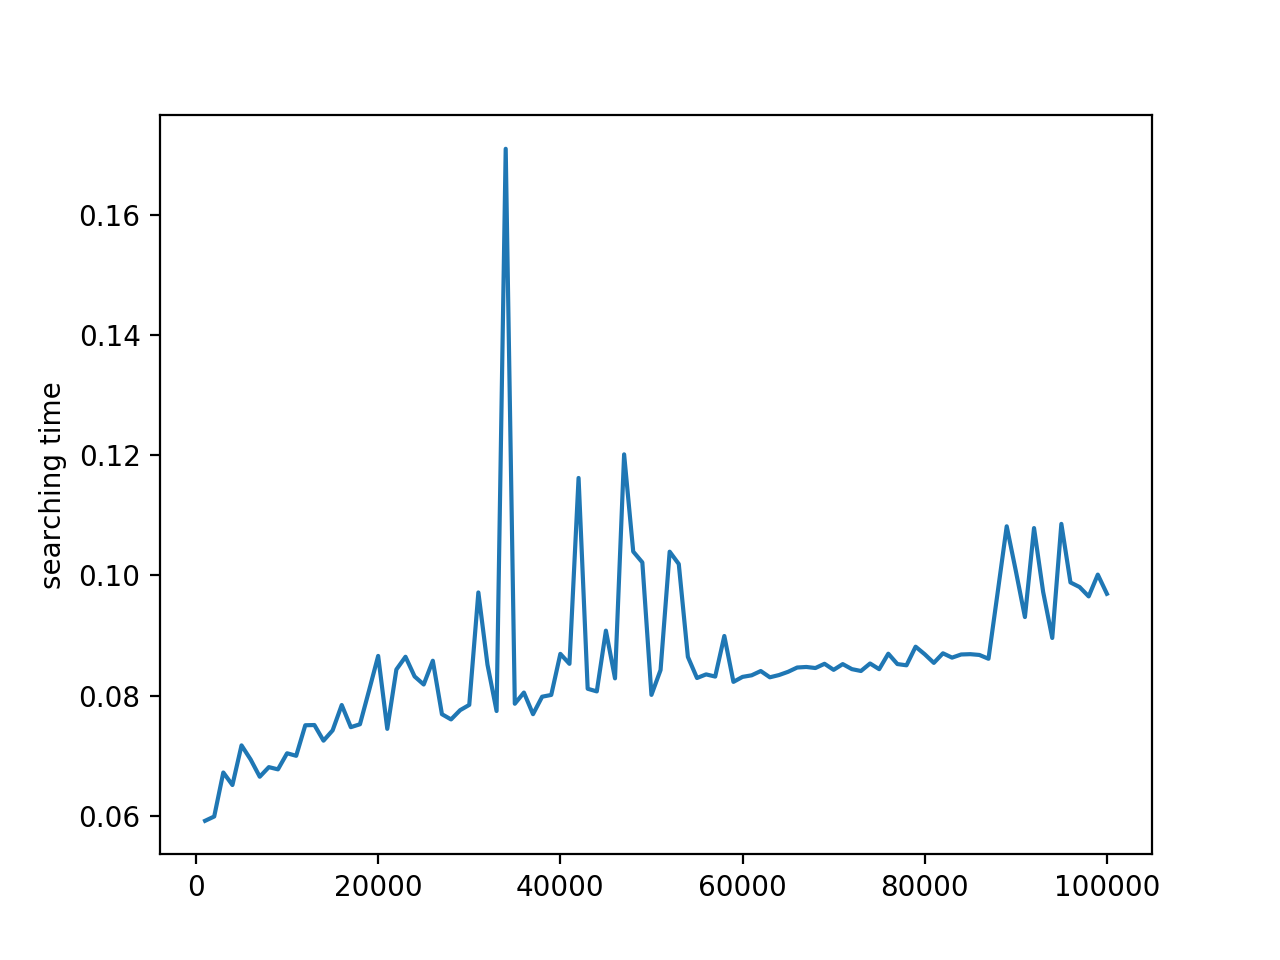

dict_values([0.059158863998163724, 0.05987299499975052, 0.06719743000212475, 0.06511477100139018, 0.07171229400046286, 0.06936187300016172, 0.06649219400060247, 0.06809266499840305, 0.06772052499945858, 0.07039817600161768, 0.06997905599928345, 0.07506207100232132, 0.07509946400023182, 0.07249458499791217, 0.07421003899798961, 0.07842971300124191, 0.0747443940017547, 0.07522597999923164, 0.08084736399905523, 0.08659931100191898, 0.07446384400100214, 0.0843401249985618, 0.08645941299982951, 0.0831827850015543, 0.08184424900173326, 0.0858032429969171, 0.07690177300173673, 0.07603193999966606, 0.07757499099898268, 0.07844892999855801, 0.09716458800176042, 0.08514875699984259, 0.07743270399805624, 0.17100689300059457, 0.0786395330032974, 0.08050075899882358, 0.07690400700084865, 0.07981472299798043, 0.08010779100004584, 0.086942744001135, 0.08528699799717288, 0.1162206899971352, 0.08113491300173337, 0.08069598600195604, 0.09080704399821116, 0.08286813299855567, 0.12014954400001443, 0.10396

In [123]:
import matplotlib.pyplot as plt
plt.plot(times.keys(), times.values())
plt.ylabel('searching time')
plt.show()
print(times.values())